In [93]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

X = np.array([[1, 3], [2, 2], [3, 1], [4, 4], [5, 5], [6, 6]])
y = np.array([0, 0, 0, 1, 1, 1])

In [94]:
m0 = X[y == 0].mean(axis=0) # within class means
m1 = X[y == 1].mean(axis=0)

cx1 = X[y == 0] - m0
cx2 = X[y == 1] - m1
S1 = np.dot(cx1.T, cx1) / (X[y == 0].shape[0] - 1) # sample covariances in each class
S2 = np.dot(cx2.T, cx2) / (X[y == 1].shape[0] - 1)

S_w = S1 + S2 # within class scatter matrix

disc_prof = np.dot(np.linalg.inv(S_w), m1 - m0) # discriminant projection w

print("Discriminant projection:", disc_prof)

Discriminant projection: [1.5 1.5]


Coefficents are [3. 3.]


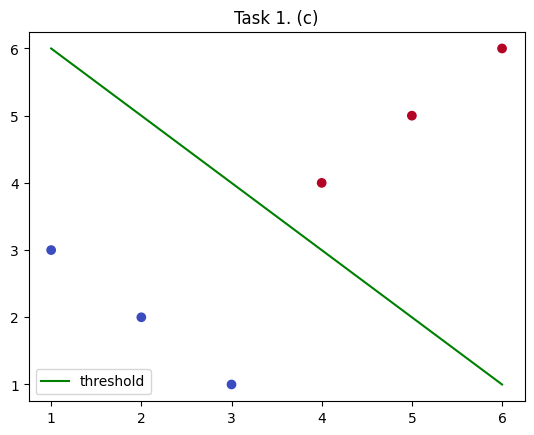

In [95]:
lda = LDA()
lda.fit(X, y)

w = lda.coef_[0]
print(f'Coefficents are {w}')
intercept = lda.intercept_[0]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm') # datra points

x_values = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
y_values = (-w[0] * x_values - intercept) / w[1]
plt.plot(x_values, y_values, label="threshold", color="green") # decision boundary line

plt.title("Task 1. (c)")
plt.legend()
plt.show()

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression

In [97]:
def metrics(y_test, y_pred):
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}; Precision: {precision_score(y_test, y_pred)}; Recall: {recall_score(y_test, y_pred)}; F-1 Score: {f1_score(y_test, y_pred)}")

In [98]:
A = pd.read_csv('bin-classifier-2.txt', header=None)
X = A.values[:, 0:2]
y = A.values[:, 2]

I = y == 1
# list comprehension
J = [not x for x in I]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # data split

lda_model = LDA() # model
parameters = {'solver': ['svd', 'lsqr', 'eigen']} # our parameters, from lectures we got these 3

grid_search_lda = GridSearchCV(lda_model, parameters, cv=5, scoring='f1') # adding a CV technique
grid_search_lda.fit(X_train, y_train)

best_model_lda = grid_search_lda.best_estimator_ # get best model
y_pred_lda = best_model_lda.predict(X_test)

metrics(y_test, y_pred_lda)

Accuracy: 0.8333333333333334; Precision: 0.7142857142857143; Recall: 1.0; F-1 Score: 0.8333333333333333


In [99]:
lr_model = LogisticRegression()
parameters = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}

grid_search_lr = GridSearchCV(lr_model, parameters, cv=5, scoring='f1')
grid_search_lr.fit(X_train, y_train)

best_model_lr = grid_search_lr.best_estimator_ # get best model
y_pred_lr = best_model_lr.predict(X_test)

metrics(y_test, y_pred_lr)

Accuracy: 0.5833333333333334; Precision: 0.5; Recall: 1.0; F-1 Score: 0.6666666666666666


Comparing LDA's 0.83 F-1 score to Logistic Regression's 0.66 score, it is obvious that best model is LDA with the highest score 0.833333.

In [100]:
print(f"Best model - LDA with F-1 Score of 0.83 and Hyper-parameters: {grid_search_lda.best_params_}")

Best model - LDA with F-1 Score of 0.83 and Hyper-parameters: {'solver': 'svd'}


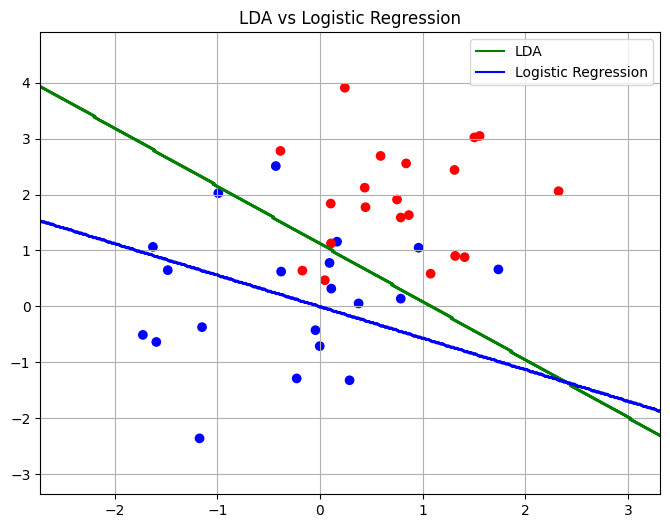

In [101]:
plt.figure(figsize=(8, 6))
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z_lda = best_model_lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z_lda = Z_lda.reshape(xx.shape)
plt.contour(xx, yy, Z_lda, colors='green')

Z_logistic = best_model_lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z_logistic = Z_logistic.reshape(xx.shape)
plt.contour(xx, yy, Z_logistic, colors='blue')

plt.plot([], [], color='green', label='LDA')
plt.plot([], [], color='blue', label='Logistic Regression')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
plt.title('LDA vs Logistic Regression')
plt.legend()
plt.grid()
plt.show()
